In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
%matplotlib inline
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')

In [4]:
cd C:\Users\Amit\Desktop


C:\Users\Amit\Desktop


In [8]:
data = pd.read_csv('hprice1.csv')

In [9]:
data.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


In [11]:
data.shape

(88, 10)

In [14]:
## We have 88 houses
#### Let us see the different variables and their statistics

def sstats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
sstats(data)


,mean,std,min,max,median,is null
price,293.546034,102.713445,111.000000,725.000000,265.500000,0
assess,315.736364,95.314437,198.700000,708.600000,290.200000,0
bdrms,3.568182,0.841393,2.000000,7.000000,3.000000,0
lotsize,9019.863636,10174.150414,1000.000000,92681.000000,6430.000000,0
sqrft,2013.693182,577.191583,1171.000000,3880.000000,1845.000000,0
colonial,0.693182,0.463816,0.000000,1.000000,1.000000,0
lprice,5.633180,0.303573,4.709530,6.586172,5.581613,0
lassess,5.717994,0.262113,5.291796,6.563291,5.670566,0
llotsize,8.905105,0.544060,6.907755,11.436920,8.768719,0
lsqrft,7.572610,0.258688,7.065613,8.263591,7.520231,0


Text(0,0.5,'lsqrft')

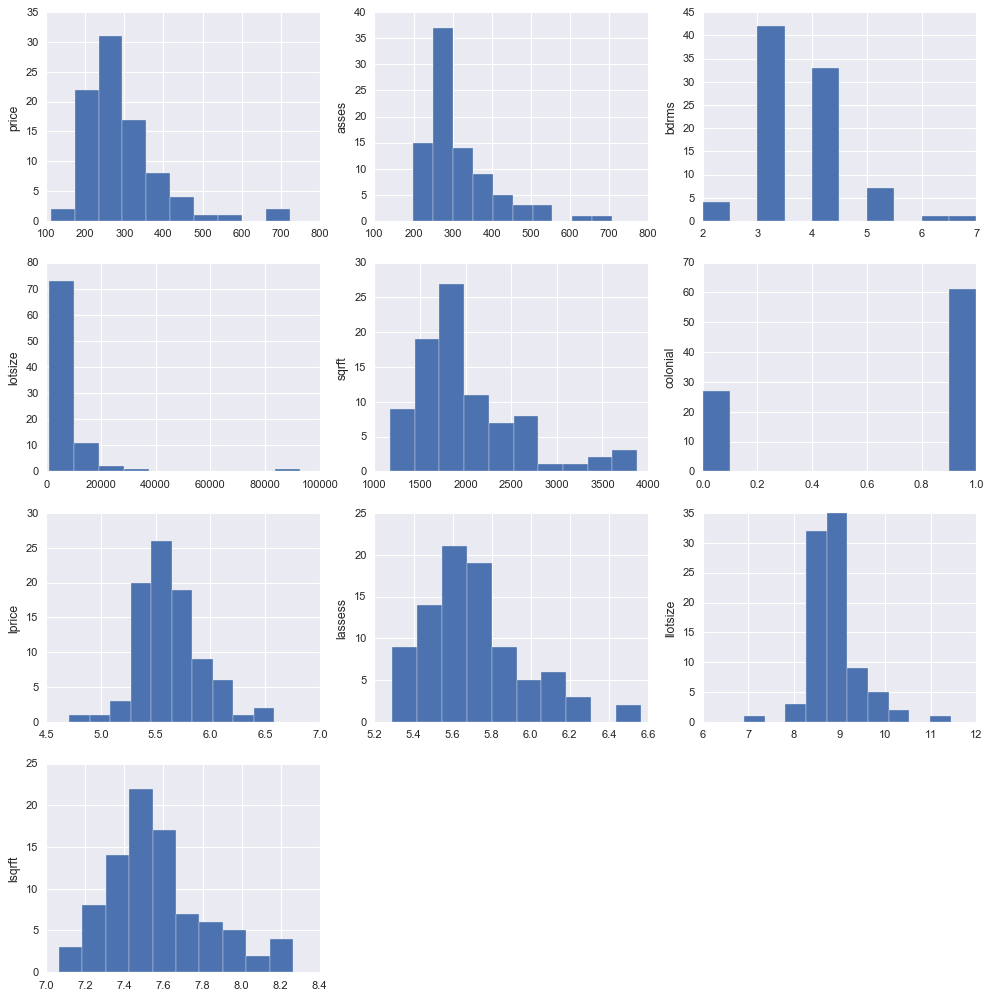

In [36]:
## The Data is clean as there are no null values
## Plotting Histograms for the variables to see the distribution of data
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title('Histograms')
plt.subplot(4,3,1)
data['price'].hist()
plt.ylabel('price')
plt.subplot(4,3,2)
data['assess'].hist()
plt.ylabel('asses')
plt.subplot(4,3,3)
data['bdrms'].hist()
plt.ylabel('bdrms')
plt.subplot(4,3,4)
data['lotsize'].hist()
plt.ylabel('lotsize')
plt.subplot(4,3,5)
data['sqrft'].hist()
plt.ylabel('sqrft')
plt.subplot(4,3,6)
data['colonial'].hist()
plt.ylabel('colonial')
plt.subplot(4,3,7)
data['lprice'].hist()
plt.ylabel('lprice')
plt.subplot(4,3,8)
data['lassess'].hist()
plt.ylabel('lassess')
plt.subplot(4,3,9)
data['llotsize'].hist()
plt.ylabel('llotsize')
plt.subplot(4,3,10)
data['lsqrft'].hist()
plt.ylabel('lsqrft')


In [37]:
## As we can see that the distribution of variables price, asses, lotsize and sqrft are Right Skewed. 
## Hence we will use the Log trasnform of these variables as the log transformed distributions are Distributed normally


In [62]:
#### Group-by Price 
data['price_range'] = pd.cut(data['price'],[100,200,300,400,500,600])


In [63]:
data.groupby(['price_range']).mean()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
price_range,,,,,,,,,,
"(100, 200]",169.500000,215.650000,3.500000,4808.333333,1600.500000,0.500000,5.114237,5.372690,8.463802,7.373081
"(200, 300]",246.500510,275.517647,3.294118,6775.019608,1772.980392,0.686275,5.502032,5.609843,8.771590,7.467107
"(300, 400]",336.785714,356.057143,3.761905,13041.285714,2198.047619,0.761905,5.816977,5.862128,9.099359,7.678453
"(400, 500]",451.075000,440.028571,4.428571,10091.428571,2878.285714,0.714286,6.109078,6.063125,9.168806,7.928687
"(500, 600]",575.000000,518.100000,5.000000,15634.000000,3880.000000,1.000000,6.354370,6.250168,9.657204,8.263591


In [68]:
## From the above Group-By, we can observe the Average No. of bedrooms,
## Lot size, size of house in square feet for different prices ranges of Houses

#### Group-by Number of Bedrooms 
data['nbdrm'] = pd.cut(data['bdrms'],[1,2,3,4,5,6,7])


In [69]:
data.groupby(['nbdrm']).mean()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
nbdrm,,,,,,,,,,
"(1, 2]",251.250000,292.125000,2.0,12802.250000,1572.250000,0.000000,5.517506,5.658681,9.355248,7.333385
"(2, 3]",261.979167,280.602381,3.0,6848.857143,1809.928571,0.642857,5.548610,5.623769,8.755052,7.481255
"(3, 4]",285.163667,319.703030,4.0,9945.151515,2085.242424,0.787879,5.613984,5.734544,8.917036,7.619867
"(4, 5]",518.003571,507.014286,5.0,16135.571429,3024.428571,0.857143,6.205942,6.200701,9.519052,7.997836
"(5, 6]",310.000000,253.600000,6.0,5348.000000,1386.000000,1.000000,5.736572,5.535758,8.584478,7.234177
"(6, 7]",477.500000,478.100000,7.0,8400.000000,3529.000000,1.000000,6.168564,6.169820,9.035987,8.168770


In [75]:
## Here we can see the range for number of bedrooms and how the average price and area of the house changes
## as per the number of bedrooms

#### Group-by Number of size in square feet 
data['sqrft_range'] = pd.cut(data['sqrft'],[1000,2000,3000,4000])

In [76]:
data.groupby(['sqrft_range']).mean()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
sqrft_range,,,,,,,,,,
"(1000, 2000]",243.777250,263.660714,3.339286,8080.767857,1675.553571,0.642857,5.477904,5.566840,8.781432,7.416256
"(2000, 3000]",341.039423,375.003846,3.769231,9138.884615,2379.384615,0.807692,5.816914,5.912864,9.007407,7.768502
"(3000, 4000]",552.250000,544.950000,4.833333,17269.000000,3585.000000,0.666667,6.286243,6.284323,9.616072,8.183045


In [79]:
### here we can see different size of houses in square feet and see the average prices and bedrooms available 
##  in the different ranges


##  Now let us run regression models
## we will use log transformed variables as they are normally distributed

model2 = smf.ols('lprice~lassess+bdrms+llotsize+lsqrft+colonial',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     57.15
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           2.71e-25
Time:                        21:00:30   Log-Likelihood:                 46.576
No. Observations:                  88   AIC:                            -81.15
Df Residuals:                      82   BIC:                            -66.29
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2097      0.569      0.368      0.714      -0.923       1.342
lassess        1.0362      0.151      6.860      0.000       0.736       1.337
bdrms          0.0254      0.023      1.104      0.273      -0.020       0.071
llotsize       0.0084      0.038      0.218      0.828      -0.068       0.085
lsqrft        -0.0921      0.138     -0.666      0.507      -0.367       0.183
colonial       0.0448      0.036      1.247      0.216      -0.027       0.116
==============================================================================
Omnibus:                       18.270   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.253
Skew:                           0.245   Prob(JB):                     2.52e-20
Kurtosis:                       7.937   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## from the regression we can see that only lassess (p-values < 0.05)is signifiacnt variable . 
## All other variables are not significant





In [85]:
model3 = smf.ols('price~bdrms+llotsize+lsqrft+colonial',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     43.71
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           1.08e-19
Time:                        21:12:49   Log-Likelihood:                -482.10
No. Observations:                  88   AIC:                             974.2
Df Residuals:                      83   BIC:                             986.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2030.4546    210.967     -9.625      0.000   -2450.060   -1610.850
bdrms         18.5723      9.308      1.995      0.049       0.060      37.085
llotsize      61.4457     12.372      4.966      0.000      36.838      86.054
lsqrft       225.5082     30.072      7.499      0.000     165.696     285.320
colonial       4.1336     14.509      0.285      0.776     -24.723      32.991
==============================================================================
Omnibus:                       24.803   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.264
Skew:                           1.102   Prob(JB):                     2.44e-10
Kurtosis:                       5.686   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
## We can see that all the variables are sognificant except colonial 
## Here the Adjusted R square value is low & AIC, BIC values are high. So we run different model below


model4 = smf.ols('price~lassess+bdrms+llotsize+lsqrft+colonial',data=data)
best = model4.fit()
best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     58.72
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           1.15e-25
Time:                        21:23:56   Log-Likelihood:                -465.01
No. Observations:                  88   AIC:                             942.0
Df Residuals:                      82   BIC:                             956.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1555.7840    190.640     -8.161      0.000   -1935.028   -1176.540
lassess      315.4296     50.569      6.238      0.000     214.833     416.026
bdrms         18.1454      7.712      2.353      0.021       2.804      33.487
llotsize      12.9084     12.870      1.003      0.319     -12.694      38.510
lsqrft       -17.8214     46.288     -0.385      0.701    -109.902      74.260
colonial       1.3909     12.029      0.116      0.908     -22.538      25.320
==============================================================================
Omnibus:                       26.878   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.192
Skew:                           1.067   Prob(JB):                     5.16e-14
Kurtosis:                       6.484   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
## Here the variables lassess, bdrms are significant  
## Adjusted R squared value is high and also AIC, BIC values are lower than model 3

In [95]:
## Using hetereoskedasticity corrected Standard errors

result=model4.fit(cov_type='HC3')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     20.04
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           5.29e-13
Time:                        21:24:31   Log-Likelihood:                -465.01
No. Observations:                  88   AIC:                             942.0
Df Residuals:                      82   BIC:                             956.9
Df Model:                           5                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1555.7840    241.738     -6.436      0.000   -2029.582   -1081.986
lassess      315.4296     54.939      5.741      0.000     207.752     423.107
bdrms         18.1454      6.381      2.844      0.004       5.639      30.652
llotsize      12.9084     11.600      1.113      0.266      -9.826      35.643
lsqrft       -17.8214     45.192     -0.394      0.693    -106.397      70.754
colonial       1.3909     15.035      0.093      0.926     -28.078      30.860
==============================================================================
Omnibus:                       26.878   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.192
Skew:                           1.067   Prob(JB):                     5.16e-14
Kurtosis:                       6.484   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [104]:
model5 = smf.ols('lprice~bdrms+llotsize+lsqrft',data=data)
best2 = model5.fit(cov_type="HC3")
best2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     44.82
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           2.14e-17
Time:                        21:30:16   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2970      0.850     -1.525      0.127      -2.964       0.370
bdrms          0.0370      0.036      1.039      0.299      -0.033       0.107
llotsize       0.1680      0.053      3.153      0.002       0.064       0.272
lsqrft         0.7002      0.121      5.768      0.000       0.462       0.938
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.890
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [137]:
# After using heteroskedasticity corrected standard errors and 
# log transformed variables we can see that lot size and sqrft are significant
# this tells us that out data had heteroskedasticity


#######Interpretations#########
## As the number of bedroom increase by one, the price of the house increases by 3.7% 
## As the lotsize increase by 1 percent, the price of the house increases by 16.8% 
## As the size of house increase by 1 percent, the price of the house increases by 70% 

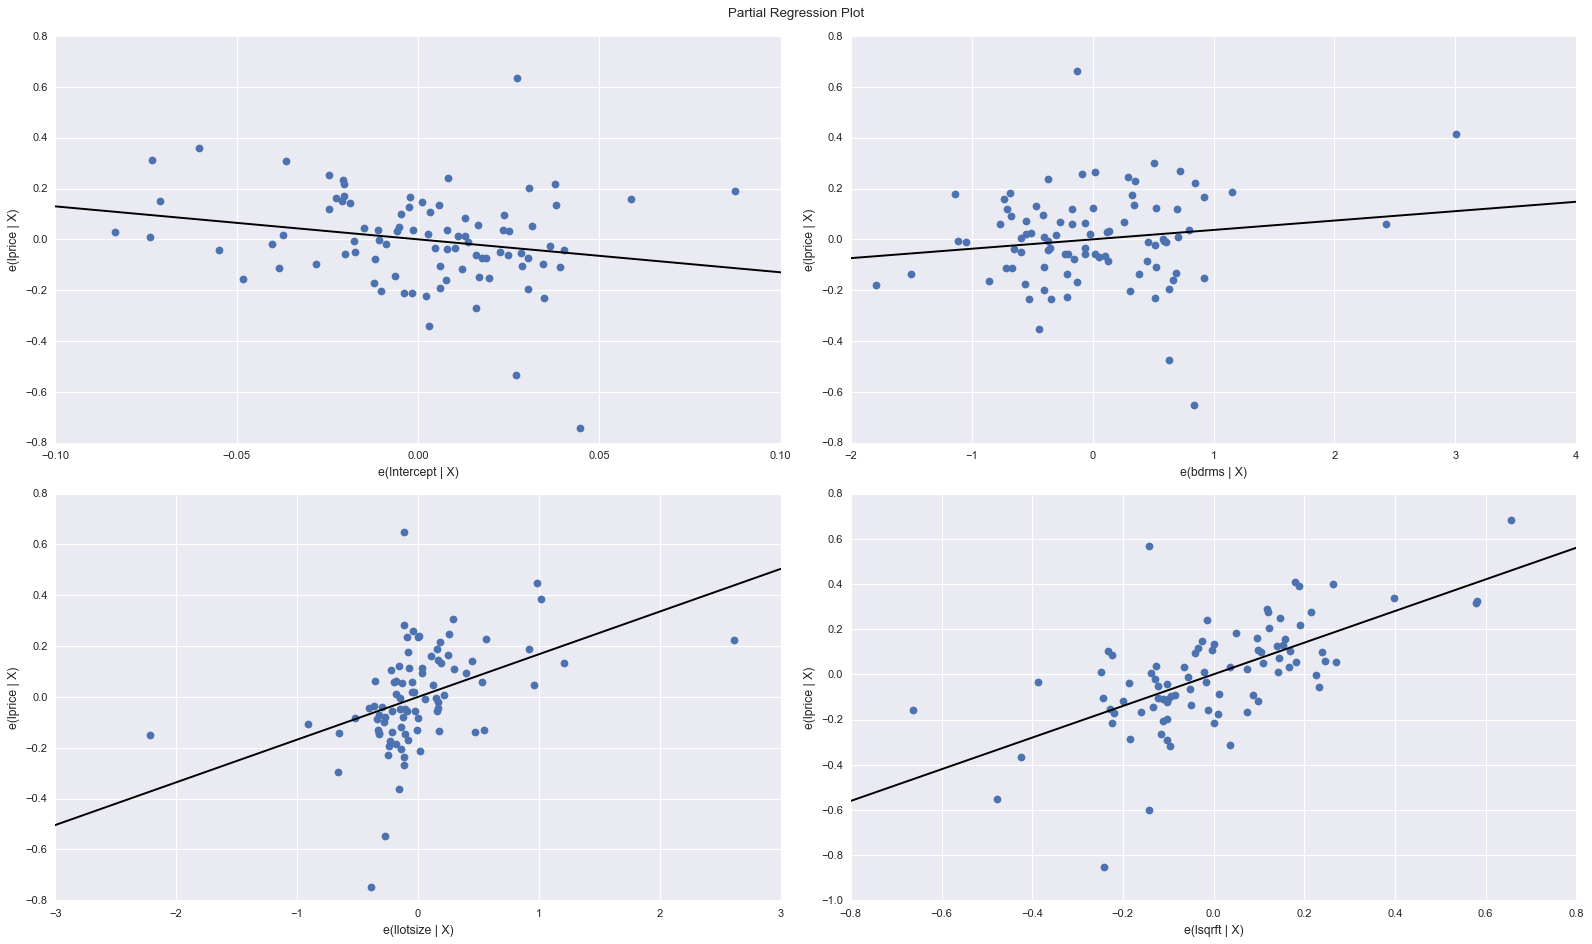

In [138]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(best2, fig=fig)

In [ ]:
# We conclude that model5 is the best fit model for the data